In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env

In [71]:
# Read in the data from mysql
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
df = pd.read_sql('''SELECT * FROM logs LEFT JOIN cohorts ON cohorts.id = logs.cohort_id;''', url)

In [72]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [73]:
df_copy = df.copy()

#### Cleaning Path Columns

In [89]:
df = df[~df.path.str.endswith('jpg',na=False)]
df = df[~df.path.str.endswith('jpeg',na=False)]
df = df[~df.path.str.endswith('svg',na=False)]
df = df[(df.path != '/') & (df.path != 'search/search_index.json')]

### Creating separate columns for each portion of the 'path'...not sure what to call them yet

In [91]:
df['path_1'] = df.path.str.split('/').str[0]
df['path_2'] = df.path.str.split('/').str[1]
df['path_3'] = df.path.str.split('/').str[2]
df['path_4'] = df.path.str.split('/').str[3]

In [92]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,path_1,path_2,path_3,path_4
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,java-ii,NaN,NaN,NaN
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,java-ii,object-oriented-programming,NaN,NaN
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,slides,object_oriented_programming,NaN,NaN
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,javascript-i,conditionals,NaN,NaN
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,javascript-i,loops,NaN,NaN


#### Create a date and time column

In [94]:
df['date'] = df['date'].str.cat(df['time'],sep=" ")

In [95]:
df.date = pd.to_datetime(df.date)

##### Set and sort the index

In [96]:
df.set_index(df.date, inplace = True)

In [97]:
df.sort_index()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,path_1,path_2,path_3,path_4
date,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,java-ii,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,java-ii,object-oriented-programming,NaN,NaN
2018-01-26 09:56:06,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,slides,object_oriented_programming,NaN,NaN
2018-01-26 09:56:24,2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,javascript-i,conditionals,NaN,NaN
2018-01-26 09:56:41,2018-01-26 09:56:41,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,javascript-i,loops,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21 16:41:51,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,jquery,personal-site,NaN,NaN
2021-04-21 16:42:02,2021-04-21 16:42:02,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,jquery,mapbox-api,NaN,NaN
2021-04-21 16:42:09,2021-04-21 16:42:09,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,jquery,ajax,weather-map,NaN


In [98]:
df.drop(columns=['date','time'], inplace=True)

#### Replace program id values

In [100]:
df.program_id.value_counts()

2.0    657581
3.0     79614
1.0     28708
4.0         4
Name: program_id, dtype: int64

In [101]:
df.program_id.replace([1.0,2.0,3.0,4.0], ['php','java','ds','fe'], inplace=True)

#### This tells us user_id's can have multiple ip's

In [103]:
len(df.user_id.unique())

969

In [104]:
len(df.ip.unique())

5234

#### rename id to cohort_id

In [105]:
df.rename(columns={'id':'cohort_id'}, inplace=True)

#### drop slack column

In [106]:
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', None, 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion',
       'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco',
       'Florence', 'Neptune', 'Oberon'], dtype=object)

In [107]:
df.slack.unique()

array(['#hampton', '#teddy', '#sequoia', '#arches', '#niagara',
       '#pinnacles', '#quincy', None, '#kings', '#lassen', '#mammoth',
       '#glacier', '#denali', '#joshua', '#olympic', '#ulysses',
       '#badlands', '#apollo', '#ike', '#voyageurs', '#wrangell',
       '#xanadu', '#franklin', '#yosemite', '#', '#zion', '#andromeda',
       '#betelgeuse', '#ceres', '#deimos', '#europa', '#fortuna',
       '#curie', '#apex', '#ganymede', '#hyperion', '#darden', '#bash',
       '#jupiter', '#kalypso', '#luna', '#easley', '#marco', '#florence',
       '#neptune', '#oberon'], dtype=object)

In [108]:
# Drop slack column
df.drop(columns='slack',inplace=True)

In [110]:
# Drop this column
df.deleted_at.value_counts()

Series([], Name: deleted_at, dtype: int64)

In [111]:
df.drop(columns='deleted_at',inplace=True)

#### All of these columns are unique to each cohort

In [113]:
len(df.start_date) == len(df.name)

True

In [114]:
len(df.created_at) == len(df.name)

True

In [115]:
len(df.updated_at) == len(df.name)

True

#### Create hour column

In [116]:
df['hour'] = df.index.hour

In [117]:
df.head()

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,java-ii,NaN,NaN,NaN,9
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,java-ii,object-oriented-programming,NaN,NaN,9
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,slides,object_oriented_programming,NaN,NaN,9
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,javascript-i,conditionals,NaN,NaN,9
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,javascript-i,loops,NaN,NaN,9


In [118]:
df.hour.value_counts()

9     117195
11     85951
14     81174
10     80962
15     74675
13     66975
16     60321
12     44632
8      43031
17     21423
21     21362
20     20874
19     17968
22     17742
18     17163
23     12081
7       9839
0       5999
6       3822
1       3181
5       1787
2       1700
4       1040
3        987
Name: hour, dtype: int64

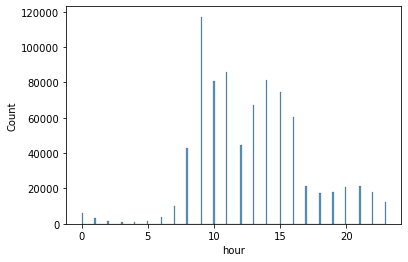

In [119]:
sns.histplot(df.hour)
plt.show()

In [125]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

#### checking out the ip column

In [126]:
ip_df = value_counts_and_frequencies(df.ip)
ip_df

,count,proba
97.105.19.58,262430,0.323236
97.105.19.61,58736,0.072345
192.171.117.210,8805,0.010845
71.150.217.33,6216,0.007656
12.106.208.194,4051,0.004990
...,...,...
107.77.221.92,1,0.000001
107.77.189.29,1,0.000001
75.54.33.183,1,0.000001
173.239.240.116,1,0.000001


<AxesSubplot:>

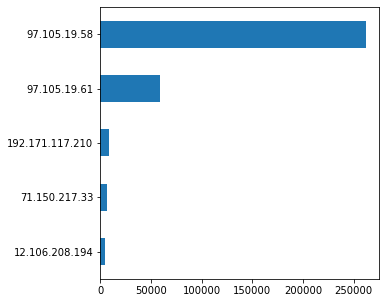

In [127]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

#### Exploring the front end developer...pretty sure it's an anomaly or they decided to rename this program id

In [128]:
df.program_id.value_counts()

java    657581
ds       79614
php      28708
fe           4
Name: program_id, dtype: int64

In [129]:
df[df.program_id=='fe']

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,9.0,207.68.209.17,9.0,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,fe,content,html-css,NaN,NaN,19
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,9.0,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,fe,content,html-css,gitbook,images,19
2018-03-22 19:02:47,content/html-css,152,9.0,207.68.209.17,9.0,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,fe,content,html-css,NaN,NaN,19
2018-03-22 19:02:52,content/html-css/introduction.html,152,9.0,207.68.209.17,9.0,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,fe,content,html-css,introduction.html,NaN,19


Only 4 rows, all of which were accesed in one day and within a couple of minutes

#### Creating Java DF

In [130]:
java_df = df[df.program_id=='java']

#### Creating PHP DF

In [132]:
php_df = df[df.program_id=='php']

In [133]:
php_df.name.value_counts()

Lassen      9425
Arches      8217
Olympic     4684
Kings       2620
Hampton     1487
Quincy      1073
Glacier      529
Joshua       294
Ike          233
Badlands      76
Franklin      67
Denali         3
Name: name, dtype: int64

#### Exploring Java students path

In [136]:
java_path_df = value_counts_and_frequencies(java_df.path_1)
java_path_df

,count,proba
javascript-i,110118,0.167459
html-css,79001,0.120139
mysql,77340,0.117613
jquery,56787,0.086357
spring,53149,0.080825
...,...,...
timeline,1,0.000002
data-science,1,0.000002
ada-capsontes.html,1,0.000002
f,1,0.000002


<AxesSubplot:>

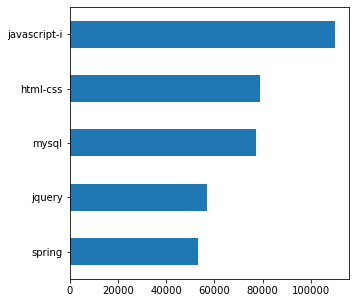

In [137]:
java_path_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

#### Exploring PHP student path

In [138]:
php_path_df = value_counts_and_frequencies(php_df.path_1)
php_path_df

,count,proba
content,6397,0.222830
javascript-i,3708,0.129163
html-css,2463,0.085795
spring,2324,0.080953
mysql,2067,0.072001
...,...,...
9.1_About,1,0.000035
teams,1,0.000035
php,1,0.000035
home,1,0.000035


<AxesSubplot:>

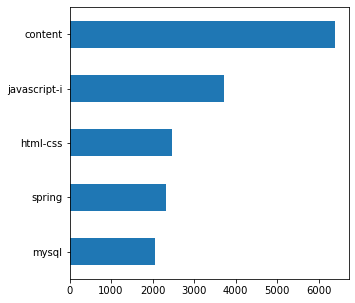

In [139]:
php_path_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

#### Create DS df

In [140]:
ds_df = df[df.program_id=='ds']

In [141]:
ds_path_df = value_counts_and_frequencies(ds_df.path_1)

<AxesSubplot:>

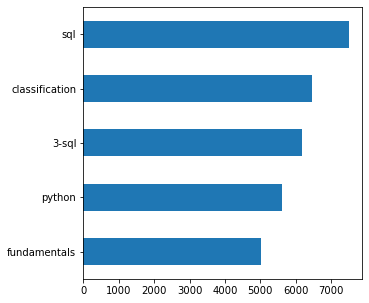

In [142]:
ds_path_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

In [143]:
df.head()

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,java-ii,NaN,NaN,NaN,9
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,java-ii,object-oriented-programming,NaN,NaN,9
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,slides,object_oriented_programming,NaN,NaN,9
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,javascript-i,conditionals,NaN,NaN,9
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,java,javascript-i,loops,NaN,NaN,9


### Making CSV's

In [154]:
df.to_csv('anomaly_project.csv')

In [156]:
ds_df.to_csv('data_science.csv')

In [157]:
java_df.to_csv('java.csv')

In [158]:
php_df.to_csv('php.csv')

In [159]:
fe_df = df[df.program_id == 'fe']

In [160]:
fe_df.to_csv('fe.csv')

In [175]:
non_ds_df = df[df.program_id != 'ds']

In [176]:
non_ds_df.to_csv('non_data_students.csv')

In [179]:
ds_df.path.value_counts().sort_values()

mkdocs/search_index.json                       1
9-timeseries/6.2-prophet                       1
appendix/git/cli                               1
12-distributed-ml/5-inspect                    1
12-distributed-ml/6.3-prepare-part-3           1
                                            ... 
6-regression/1-overview                     1124
fundamentals/intro-to-data-science          1413
sql/mysql-overview                          1424
1-fundamentals/1.1-intro-to-data-science    1633
classification/overview                     1785
Name: path, Length: 634, dtype: int64

### What are students up to after they graduate?

In [240]:
# Creating a DF for all post grad DS students
ds_grads = ds_df[ds_df.index > ds_df.end_date]

In [196]:
ds_grads[ds_grads.name == 'Bayes']

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2020-01-30 08:01:31,1-fundamentals/1.1-intro-to-data-science,485,34.0,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,1-fundamentals,1.1-intro-to-data-science,NaN,NaN,8
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476,34.0,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,1-fundamentals,1.1-intro-to-data-science,NaN,NaN,11
2020-01-31 14:47:20,4-python/7.4.4-advanced-dataframes,476,34.0,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,4-python,7.4.4-advanced-dataframes,NaN,NaN,14
2020-01-31 14:47:26,3-sql/1-mysql-overview,476,34.0,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,3-sql,1-mysql-overview,NaN,NaN,14
2020-01-31 14:47:27,3-sql/2-mysql-introduction,476,34.0,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,3-sql,2-mysql-introduction,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20 21:25:04,classification/overview,478,34.0,67.11.138.10,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,classification,overview,NaN,NaN,21
2021-04-20 21:25:08,anomaly-detection/overview,478,34.0,67.11.138.10,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,anomaly-detection,overview,NaN,NaN,21
2021-04-20 21:25:19,capstones/capstones,478,34.0,67.11.138.10,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,ds,capstones,capstones,NaN,NaN,21


In [197]:
ds_grads.name

date
2020-01-30 08:01:31     Bayes
2020-01-31 11:05:13     Bayes
2020-01-31 14:47:20     Bayes
2020-01-31 14:47:26     Bayes
2020-01-31 14:47:27     Bayes
                        ...  
2021-04-21 13:17:05    Darden
2021-04-21 13:17:07    Darden
2021-04-21 15:20:12    Darden
2021-04-21 15:20:14    Darden
2021-04-21 15:20:18    Darden
Name: name, Length: 8108, dtype: object

In [201]:
ds_grads.path.value_counts().head(10)

sql/mysql-overview                          275
classification/overview                     267
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    127
sql/database-design                          87
6-regression/1-overview                      86
classification/prep                          77
fundamentals/environment-setup               76
stats/compare-means                          73
Name: path, dtype: int64

In [203]:
non_ds_grads = non_ds_df[non_ds_df.index > non_ds_df.end_date]

In [204]:
non_ds_grads.path.value_counts().head(10)

javascript-i     4969
spring           4272
html-css         3687
java-iii         3541
java-ii          3444
java-i           3130
appendix         3086
javascript-ii    2981
mysql            2584
toc              2574
Name: path, dtype: int64

In [207]:
df.user_id.value_counts().sort_values()

574        1
593        1
212        1
165        1
652        1
       ...  
1       5921
314     7320
53     12222
11     13619
64     14981
Name: user_id, Length: 969, dtype: int64

In [211]:
df[df.user_id == 574]

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2020-01-30 20:50:49,toc,574,24.0,24.160.4.6,24.0,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,java,toc,NaN,NaN,NaN,20


In [213]:
len(df[df.user_id == 593])

1

### Creating 'counts' to be able to sort active and non active users

In [216]:
counts =  df.user_id.value_counts()
counts[counts<2]

593    1
652    1
165    1
212    1
574    1
Name: user_id, dtype: int64

In [229]:
df[df['user_id'].isin(counts[counts < 2].index)]

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2018-03-30 21:37:04,index.html,165,16.0,24.243.3.200,16.0,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,java,index.html,NaN,NaN,NaN,21
2018-06-19 09:21:08,students/units/75/sub_units/268,212,1.0,170.248.173.247,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,students,units,75,sub_units,9
2020-01-30 20:50:49,toc,574,24.0,24.160.4.6,24.0,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,java,toc,NaN,NaN,NaN,20
2020-02-17 11:45:21,index.html,593,14.0,167.24.104.150,14.0,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,php,index.html,NaN,NaN,NaN,11
2020-05-18 09:56:10,loguout,652,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,java,loguout,NaN,NaN,NaN,9


In [239]:
df[df['user_id'].isin(counts[counts > 10000].index)]

,path,user_id,cohort_id,ip,cohort_id,name,start_date,end_date,created_at,updated_at,program_id,path_1,path_2,path_3,path_4,hour
date,,,,,,,,,,,,,,,,
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,javascript-i,NaN,NaN,NaN,10
2018-01-26 10:15:02,javascript-i/functions,11,1.0,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,javascript-i,functions,NaN,NaN,10
2018-01-26 11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,appendix,further-reading,javascript,hoisting.html,11
2018-01-26 11:46:39,appendix,11,1.0,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,appendix,NaN,NaN,NaN,11
2018-01-26 11:46:47,appendix/further-reading/javascript/hoisting,11,1.0,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,php,appendix,further-reading,javascript,hoisting,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:49,jquery,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,java,jquery,NaN,NaN,NaN,16
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,java,jquery,personal-site,NaN,NaN,16
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,java,jquery,mapbox-api,NaN,NaN,16
